In [24]:
#pixel values - 0-255
import cv2
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import seaborn as sns 

%matplotlib inline
img = cv2.imread('Bike3.jpg')

In [ ]:
img

In [6]:
#Image pixel value scaling?
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_scaled = img/255

In [3]:
0/255

0.0

In [5]:
126/255

0.49411764705882355

In [ ]:
img_scaled
#1. Speed of computation

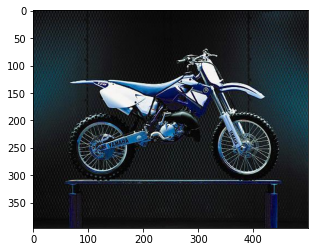

In [10]:
plt.imshow(img_scaled, vmin=0,vmax = 1)

In [11]:
#Structure data 
#We apply this to numerical Columns!!!!
#1. Dataset in the same scale - 
#Salary Age 
# 50,000 25
# 60,000 30
# 70,000 40
# 80,000 45

#2. The overall computational speed
#3. Normalization - Which could bring the data into Normal values

In [13]:
original_data = np.random.exponential(size = 1000)

In [15]:
scaled_data = minmax_scaling(original_data,columns=[0])

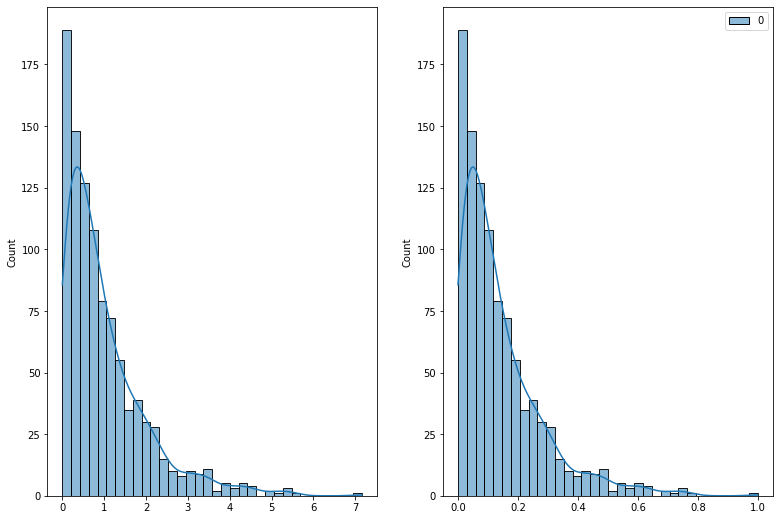

In [17]:
fig,ax = plt.subplots(1,2,figsize=(13,9))
sns.histplot(original_data,ax =ax[0],kde=True)
sns.histplot(scaled_data,ax = ax[1], kde = True)

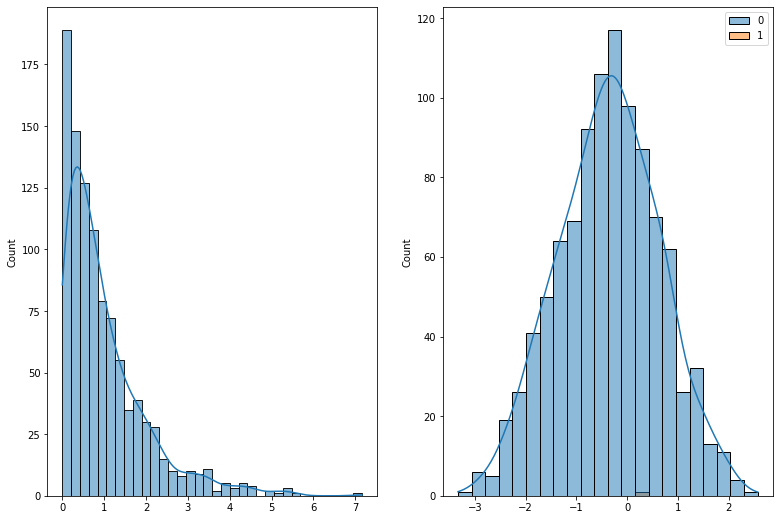

In [18]:
normalized_data = stats.boxcox(original_data)

fig,ax = plt.subplots(1,2,figsize=(13,9))
sns.histplot(original_data,ax =ax[0],kde=True)
sns.histplot(normalized_data,ax = ax[1], kde = True)

In [ ]:
#Both when we want to bring the data into same scale
#Both the cases we transform the points
#Scaling - Transform the range of your data only!
#Normalization - Change the shape of the distrubution of your data as well!

In [ ]:
One_hot_encoding

Company  - Infosys Wipro Tcs
Infosys  -   1       0.   0 
Wipro    -   0.      1.   0 
TCS.     -   0       0.   1


In [22]:
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [23]:
#Target Leakage!!!! DONOT PERFORM ANT PREPROCESSING ON YOUR TARGET COLUMN!!!!!!!
#Just converting to numbers - Label encoding is ok!!! Otherwise no!!!!!!
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [25]:
#SKLEARN BASED FUNC.
#initialize
#Training - Fit-Transform 
#Test - Just transform
scaler = StandardScaler()

In [26]:
columns_to_encode = ['rank']
columns_to_scale = ['gre','gpa']

In [27]:
onehot = OneHotEncoder(sparse =False)

In [29]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [33]:
scaled_columns = scaler.fit_transform(data[columns_to_scale])
#scaled_test = scaler.transform(test)
encoded_columns = onehot.fit_transform(data[columns_to_encode])

pd.DataFrame(encoded_columns, columns = data['rank'].value_counts().index.sort_values())

,1,2,3,4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
395,0.0,1.0,0.0,0.0
396,0.0,0.0,1.0,0.0
397,0.0,1.0,0.0,0.0
398,0.0,1.0,0.0,0.0


In [ ]:
#Issues with one-hot encoding
#Dimension Explosion - What is dimensionality? - No. of columns are exploding
#Sparse matrix

In [30]:
processed_data = np.concatenate([scaled_columns,encoded_columns],axis =1)

In [ ]:
processed_data